In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pickle
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
print("Imported modules successfully")

Imported modules successfully


In [3]:
game2k = ['2k' + str(i) for i in range(10, 23)]

games = []
players = []
ratings = []
for game in game2k:  
  the_file = open('drive/MyDrive/NBA/{}Ratings.txt'.format(game), 'r')
  all_players = [p.strip().split('\t') for p in the_file if 'PLAYER' not in p and len(p) > 2]
  games += [game for i in range(len(all_players))]
  players += [p[1] for p in all_players]
  ratings += [int(p[2]) for p in all_players]

player2rating = pd.DataFrame({
    'Game': games,
    'Player': players,
    'Rating': ratings
})
print(player2rating)

      Game         Player  Rating
0     2k10    Kobe Bryant      97
1     2k10   LeBron James      96
2     2k10    Dwyane Wade      96
3     2k10     Chris Paul      94
4     2k10  Dwight Howard      89
...    ...            ...     ...
5733  2k22      CJ Elleby      68
5734  2k22   Didi Louzada      68
5735  2k22     Jay Scrubb      67
5736  2k22  Markus Howard      67
5737  2k22      Josh Hall      66

[5738 rows x 3 columns]


In [4]:
games = []
players = []
salary = []
for game in game2k:
  the_file = open('drive/MyDrive/NBA/{}Salary.txt'.format(game), 'r')
  all_things = [p.strip().split('\t') for p in the_file if 'PLAYER' not in p and len(p) > 2]
  if game != '2k22':
    salaries = [int(re.sub("[^0-9]", "", t[-1])) for t in all_things]
  else:
    salaries = [int(re.sub("[^0-9]", "", t[2])) for t in all_things]
  the_players = [t[1] for t in all_things]

  games += [game for i in range(len(salaries))]
  players += the_players
  salary += salaries

player2salary = pd.DataFrame({
    'Game': games,
    'Player': players,
    'Salary': salary
})
print(player2salary)

      Game            Player    Salary
0     2k10     Tracy McGrady  29273532
1     2k10       Kobe Bryant  29015070
2     2k10   Jermaine O'Neal  28991924
3     2k10        Tim Duncan  27942919
4     2k10  Shaquille O'Neal  25192843
...    ...               ...       ...
6821  2k22   Jaime Echenique     53176
6822  2k22    Jordan Goodwin     53176
6823  2k22    Jordan Schakel     53176
6824  2k22       Craig Sword     53176
6825  2k22      Jared Harper     50517

[6826 rows x 3 columns]


In [5]:
games = []
players = []
other_columns = ['MIN', 'PTS', 'FG%', '3P%', 'FT%', 'REB', 'AST', 'TOV', 'BLK', 'STL', '+/-']
data = [[] for i in range(len(other_columns))]
dataToStat = {0:5, 1:6, 2:9, 3:12, 4:15, 5:18, 6:19, 7:20, 8:22, 9:21, 10:27}

for game in game2k:  
  the_file = open('drive/MyDrive/NBA/{}Stats.txt'.format(game), 'r')
  stats1 = [p.strip().split('\t') for p in the_file if 'PLAYER' not in p and len(p) > 1]
  stats1 = [l for l in stats1 if not l[0].isnumeric()]
  games += [game for i in range(int(len(stats1)/2))]
  players += [stats1[i][0] for i in range(0, len(stats1), 2)]

  for i in range(len(data)):
    data[i] += [float(stats1[j][dataToStat[i]]) for j in range(1, len(stats1), 2)]

player2stat = pd.DataFrame({
    'Game':games,
    'Player':players
})
for i in range(len(data)):
  player2stat[other_columns[i]] = data[i]

print(player2stat)

      Game           Player   MIN   PTS   FG%   3P%   FT%  REB  AST  TOV  BLK  \
0     2k10     Kevin Durant  39.5  30.1  47.6  36.5  90.0  7.6  2.8  3.3  1.0   
1     2k10     LeBron James  39.0  29.7  50.3  33.3  76.7  7.3  8.6  3.4  1.0   
2     2k10  Carmelo Anthony  38.2  28.2  45.8  31.6  83.0  6.6  3.2  3.0  0.4   
3     2k10      Kobe Bryant  38.8  27.0  45.6  32.9  81.1  5.4  5.0  3.2  0.3   
4     2k10      Dwyane Wade  36.3  26.6  47.6  30.0  76.1  4.8  6.5  3.3  1.1   
...    ...              ...   ...   ...   ...   ...   ...  ...  ...  ...  ...   
6514  2k22       Sam Dekker   0.9   0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0   
6515  2k22   Trayvon Palmer  16.8   0.0   0.0   0.0   0.0  2.0  0.0  1.0  0.0   
6516  2k22       Tyler Hall   1.9   0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0   
6517  2k22     Xavier Sneed   3.8   0.0   0.0   0.0   0.0  1.0  0.0  0.0  0.0   
6518  2k22   Zylan Cheatham   5.2   0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0   

      STL   +/-  
0     1.4

In [6]:
all_stats = pd.merge(player2rating, player2stat, on=['Game', 'Player'])
all_stats = pd.merge(all_stats, player2salary, on=['Game', 'Player'])
all_stats['Game'] = all_stats['Game'].apply(lambda x: int(x[-2:]))
print(all_stats)

      Game         Player  Rating   MIN   PTS   FG%   3P%   FT%   REB   AST  \
0       10    Kobe Bryant      97  38.8  27.0  45.6  32.9  81.1   5.4   5.0   
1       10   LeBron James      96  39.0  29.7  50.3  33.3  76.7   7.3   8.6   
2       10    Dwyane Wade      96  36.3  26.6  47.6  30.0  76.1   4.8   6.5   
3       10     Chris Paul      94  38.1  18.7  49.3  40.9  84.7   4.2  10.7   
4       10  Dwight Howard      89  34.7  18.3  61.2   0.0  59.2  13.2   1.8   
...    ...            ...     ...   ...   ...   ...   ...   ...   ...   ...   
4972    22     Louis King      68  10.4   4.5  31.9  29.6  70.0   1.2   0.9   
4973    22      CJ Elleby      68  15.1   4.3  39.2  29.0  80.8   2.9   1.1   
4974    22   Didi Louzada      68   3.5   0.0   0.0   0.0   0.0   1.0   0.5   
4975    22     Jay Scrubb      67   6.7   2.7  39.1  28.6  70.0   0.9   0.4   
4976    22  Markus Howard      67   6.1   4.1  37.0  43.4  92.9   0.3   0.3   

      TOV  BLK  STL  +/-    Salary  
0     3.2  0.3

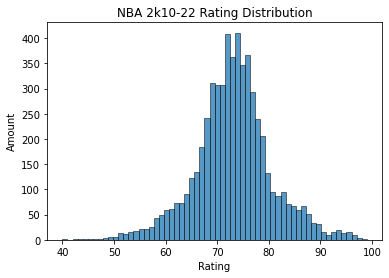

In [7]:
sns.histplot(x='Rating', data=player2rating, bins=60) 
plt.title('NBA 2k10-22 Rating Distribution')
plt.ylabel('Amount')
plt.show()

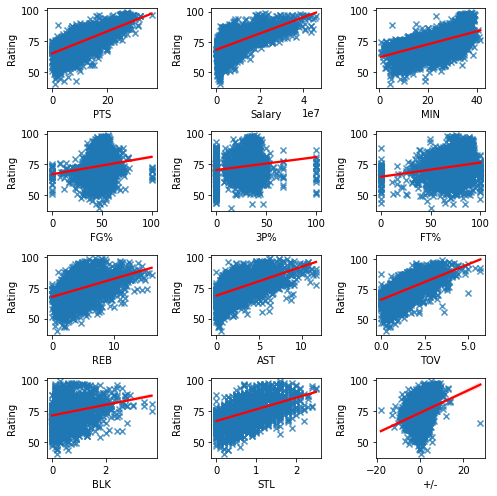

In [8]:
cols = ['PTS', 'Salary', 'MIN', 'FG%', '3P%', 'FT%', 'REB', 'AST', 'TOV', 'BLK', 'STL', '+/-']

fig, ax = plt.subplots(4, 3, figsize=(7,7))

corr_idx = 0
for i in range(4):
  for j in range(3):
    sns.regplot(ax=ax[i][j], x=cols[corr_idx], y='Rating', data=all_stats, marker='x', line_kws={"color": "red"})
    corr_idx += 1

fig.tight_layout()
plt.show()

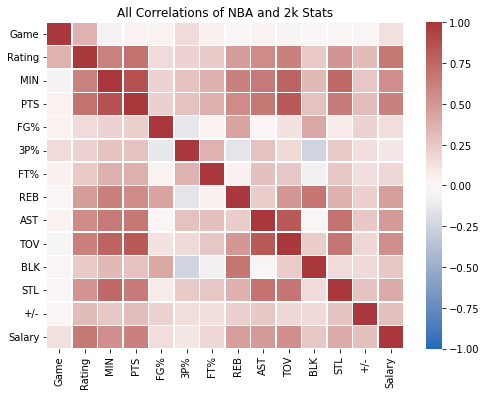

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(all_stats.drop('Player', axis=1).corr(), linewidths=0.5, cmap='vlag', vmin=-1.0, vmax=1.0)
plt.title('All Correlations of NBA and 2k Stats')
plt.show()

In [10]:
X = np.array(all_stats.drop(['Player','Rating', 'Game', 'Salary'], axis=1))
y = np.array(all_stats['Rating'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3732, 11) (3732,)
(1245, 11) (1245,)


In [11]:
model_rating = Ridge().fit(X_train, y_train)

y_pred = np.array(model_rating.predict(X_test)).reshape(-1,)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

5.237944341490791


In [12]:
X = np.array(all_stats.drop(['Player','Rating', 'Game', 'Salary'], axis=1))
y = np.array(all_stats['Salary'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3732, 11) (3732,)
(1245, 11) (1245,)


In [13]:
model_salary = Ridge().fit(X_train, y_train)
y_pred = np.array(model_salary.predict(X_test)).reshape(-1,)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

5616143.610568053


In [14]:
input_cols = ['MIN', 'PTS', 'FG%', '3P%', 'FT%', 'REB', 'AST', 'TOV', 'BLK', 'STL', '+/-']

def predict2kRating(data):
  pred = np.array(model_rating.predict(data)).reshape(-1,)
  return pred

def predictSalary(data):
  pred = np.array(model_salary.predict(data)).reshape(-1,)
  return pred

def rating2percentile(rating):
  all_ratings = np.array(all_stats['Rating'])
  percentile = stats.percentileofscore(all_ratings, rating)
  if percentile > 99 and percentile < 100: percentile = 99

  return int(percentile)

def salary2percentile(salary):
  all_salaries = np.array(all_stats['Salary'])
  percentile = stats.percentileofscore(all_salaries, salary)
  if percentile > 99 and percentile < 100: percentile = 99

  return int(percentile)

the_list = [[20, 15.0, 65.0, 50.0, 100.0, 2.0, 10.0, 0.0, 2.0, 4.0, 4.0]]
rating = predict2kRating(the_list)
salary = predictSalary(the_list)
print(rating)
print(rating2percentile(rating[0]))
print(salary)
print(salary2percentile(salary[0]))

[93.41815273]
98
[16600294.48203095]
87


In [16]:
pickle.dump(model_rating, open('drive/MyDrive/model_rating.sav', 'wb'))
pickle.dump(model_salary, open('drive/MyDrive/model_salary.sav', 'wb'))
print("Model saving complete!")

Model saving complete!


In [17]:
all_stats.to_csv('drive/MyDrive/all_stats.csv', index=False)
print("Dataframing saving complete!")

Dataframing saving complete!
